In [52]:
# Code for project 1
# Jack Jiang
# CMDA 3634

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import mpl_toolkits.mplot3d.axes3d as p3

In [115]:
# Evaluates the standing wave equation
# omega to the wave equation u_k on the
# computational grid.
#
# Parameters:
#     n = size of computational grid, nxn
#     t = current time in the simulation
#     m_x, m_y = number of nodes in standing wave
#
# Returns:
#     The computed wave equation on the computational grid.
def to_wave_equation(n, t, m_x, m_y):
    omega = np.pi * np.sqrt((m_x)**2 + (m_y)**2)
    matrix = []
    matrix = np.empty([n, n])
    for y in range(np.shape(matrix)[0]):
        for x in range(np.shape(matrix)[1]):
            matrix[y][x] = (np.sin(m_x * np.pi * x) * np.sin(m_y * np.pi * y) * 
            np.cos(omega * t))
    return matrix    # return 
    

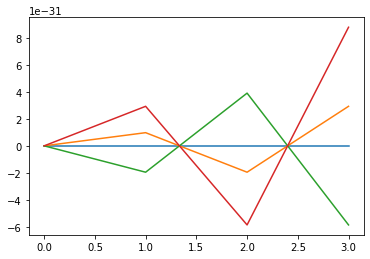

In [116]:
plt.plot(to_wave_equation(4, 1, 3, 3))
plt.show()

In [138]:
# Checks if a coordinate is a boundary point.
#
# Parameters:
#     array = an existing numpy array of size nxn
#     n = length/width of square grid nxn
#     x = x-coordinate of point
#     y = y-coordinate of point
#
# Returns:
#     True if coordinate is a boundary point, false otherwise.
def boundary_check(n, i, j):
    if (i == 0 or i == (n-1) or j == 0 or j == (n-1)):
        return True
    return False

# Computes one time step of the
# wave equation simulation, u_k+1.
#
# Parameters:
#     array = an existing numpy array of size nxn
#     t = current time in the simulation
#     m_x, m_y = number of nodes in standing wave
#
# Returns:
#     A computed time step of the wave equation simulation.
def timestep(n, t, m_x, m_y, u_kprev, dt):
    # u_kprev = to_wave_equation
    u_k = to_wave_equation(n, t, m_x, m_y)
    u_knext = u_k
    dx = 1 / (n-1)
    
    for j in range(np.shape(u_k)[0]):
        for i in range(np.shape(u_k)[1]):
            if boundary_check(n, i, j):
                u_knext[j][i] = 0
            else:
                lap = (-4 * u_k[j][i] + u_k[j-1][i] + u_k[j][i-1] + 
                       u_k[j+1][i] + u_k[j][i+1]) / (dx**2)
                u_knext[j][i] = -u_kprev[j][i] + 2*u_k[j][i] + (dt**2 * lap)
                
    return u_knext

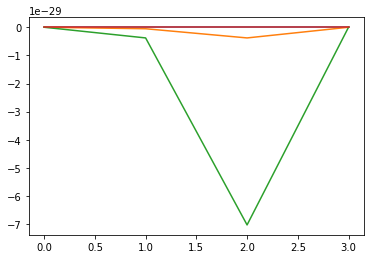

In [139]:
u_kprev = to_wave_equation(4, 1, 3, 3)
plt.plot(timestep(4, 2, 3, 3, u_kprev, 1))
plt.show()

In [ ]:
# Computes and returns n_t iterations of the simulation.
#
# Parameters:
#     T = final simulation time
#     n = grid size of the computational grid
#     m_x, m_y = number of stationary nodes
# Returns:
#     n_t iterations of the simulation.
def simulate(T, n, m_x, m_y):
    alpha = 1    # to be varied
    dx = 1 / (n - 1)
    dt = (alpha * dx) / np.sqrt(2)
    U = []
    flag = True;
    for time in range(0, T + 1, dt):
        if (flag):        # Get u_kprev
            u_kprev = to_wave_equation(n, time, m_x, m_y)
            flag = False
        u_knext = timestep(n, time, m_x, m_y, u_kprev, dt)
        
    
    


In [ ]:
def animate_wave_simulation_2D(U):
    """
    Creates a 2D animation of a wave simulation.

    Automatically selects color-scale.  In the event of instability or
    a wild range of values, some components might not be easily seen.
    Consider tweaking this scale if you need to.

    Parameters
    ----------
    U: list-like
       A list of 2D wavefields to animate.

    Returns
    -------
    Matplotlib animation class instance.

    """

    fig = plt.figure()

    cmin, cmax = U[0].min(), U[0].max()
    for u in U:
        cmin = min(cmin, u.min())
        cmax = max(cmax, u.max())

    cmin = max(-1, cmin)
    cmax = min(1, cmax)

    im = plt.imshow(U[0], clim=(cmin,cmax), cmap='gray')
    def animate(i):
        im.set_data(U[i])
        return (im,)

    ani = animation.FuncAnimation(fig, animate, interval=50, repeat_delay=1000)

    return ani


def animate_wave_simulation_3D(U):
    """
    Creates a 3D surface animation of a wave simulation.

    Automatically selects color-scale.  In the event of instability or
    a wild range of values, some components might not be easily seen.
    Consider tweaking this scale if you need to.

    Adapted from https://stackoverflow.com/a/45713451 under the 
    CC BY-SA 3.0 license.

    Parameters
    ----------
    U: list-like
       A list of 2D wavefields to animate.

    Returns
    -------
    Matplotlib animation class instance.

    """
    
    grid_y = np.linspace(0, 1, U[0].shape[0])
    grid_x = np.linspace(0, 1, U[0].shape[1])
    YY, XX = np.meshgrid(grid_y, grid_x)

    fig = plt.figure()
    ax = p3.Axes3D(fig)


    cmin, cmax = U[0].min(), U[0].max()
    for u in U:
        cmin = min(cmin, u.min())
        cmax = max(cmax, u.max())

    cmin = max(-1, cmin)
    cmax = min(1, cmax)

    surf = [ax.plot_surface(YY, XX, U[0], cmap="viridis", clim=(cmin, cmax))]
    ax.set_zlim(1.1*cmin, 1.1*cmax)

    def animate(i, U, surf):
        surf[0].remove()
        surf[0] = ax.plot_surface(YY, XX, U[i], cmap="viridis", clim=(-1,1))

    ani = animation.FuncAnimation(fig, animate, fargs=(U, surf), interval=50, repeat_delay=1000)

    return ani